In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [3]:
obj=pd.read_csv(r"/content/Mall_Customers.csv")
obj.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#3. Perform Below Visualizations

#a) Univariate Analysis

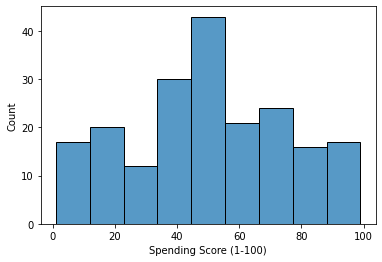

In [4]:
sns.histplot(obj['Spending Score (1-100)'])

#b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


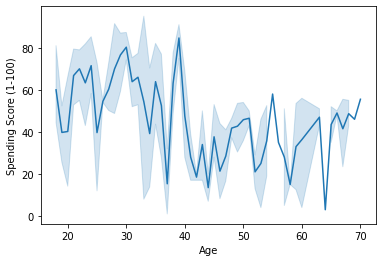

In [5]:
sns.lineplot(obj['Age'],obj['Spending Score (1-100)'])

#c)Multi - Variate Analysis

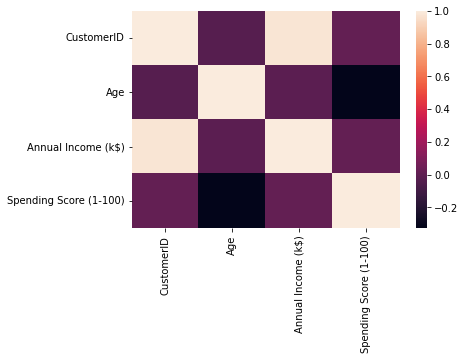

In [6]:
sns.heatmap(obj.corr())

#4. Perform descriptive statistics on the dataset

In [7]:
obj.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
obj.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

#5. Check for Missing values and deal with them.

In [9]:
obj.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

#6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


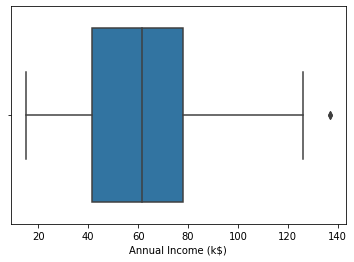

In [10]:
sns.boxplot(obj['Annual Income (k$)'])

In [11]:
q=obj.quantile([0.95,0.85])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,66.05,103.0,92.0
0.85,170.15,54.15,87.0,79.3


In [12]:
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                19.9
Age                       11.9
Annual Income (k$)        16.0
Spending Score (1-100)    12.7
dtype: float64

In [13]:
u=q.iloc[0]+(1.5*iqr)
u

CustomerID                219.90
Age                        83.90
Annual Income (k$)        127.00
Spending Score (1-100)    111.05
dtype: float64

In [14]:
l=q.iloc[1]-(1.5*iqr)
l

CustomerID                140.30
Age                        36.30
Annual Income (k$)         63.00
Spending Score (1-100)     60.25
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


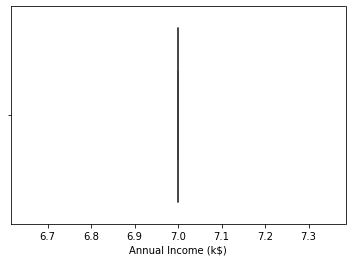

In [15]:
obj['Annual Income (k$)']=np.where(obj['Annual Income (k$)']>10,7,obj['Annual Income (k$)'])
sns.boxplot(obj['Annual Income (k$)'])

#7. Check for Categorical columns and perform encoding.

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
obj['Gender']=le.fit_transform(obj['Gender'])
obj.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,7,39
1,2,1,21,7,81
2,3,0,20,7,6
3,4,0,23,7,77
4,5,0,31,7,40


#8. Scaling the data

In [19]:
x=obj.drop('Spending Score (1-100)',axis=1)
y=obj['Spending Score (1-100)']
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,7
1,2,1,21,7
2,3,0,20,7
3,4,0,23,7
4,5,0,31,7
...,...,...,...,...
195,196,0,35,7
196,197,0,45,7
197,198,1,32,7
198,199,1,32,7


In [20]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=MinMaxScaler()
x_scale=s.fit_transform(x)
x_scale

array([[0.        , 1.        , 0.01923077, 0.        ],
       [0.00502513, 1.        , 0.05769231, 0.        ],
       [0.01005025, 0.        , 0.03846154, 0.        ],
       [0.01507538, 0.        , 0.09615385, 0.        ],
       [0.0201005 , 0.        , 0.25      , 0.        ],
       [0.02512563, 0.        , 0.07692308, 0.        ],
       [0.03015075, 0.        , 0.32692308, 0.        ],
       [0.03517588, 0.        , 0.09615385, 0.        ],
       [0.04020101, 1.        , 0.88461538, 0.        ],
       [0.04522613, 0.        , 0.23076923, 0.        ],
       [0.05025126, 1.        , 0.94230769, 0.        ],
       [0.05527638, 0.        , 0.32692308, 0.        ],
       [0.06030151, 0.        , 0.76923077, 0.        ],
       [0.06532663, 0.        , 0.11538462, 0.        ],
       [0.07035176, 1.        , 0.36538462, 0.        ],
       [0.07537688, 1.        , 0.07692308, 0.        ],
       [0.08040201, 0.        , 0.32692308, 0.        ],
       [0.08542714, 1.        ,

#9. Perform any of the clustering algorithms

In [22]:
from sklearn.cluster import KMeans
km=KMeans()
clust=km.fit_predict(x_scale)
clust

array([4, 4, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 2, 5, 4, 4, 5, 4, 3, 5, 4, 4,
       2, 4, 2, 4, 2, 4, 5, 5, 3, 5, 3, 4, 2, 5, 5, 5, 5, 5, 2, 4, 3, 5,
       2, 5, 2, 5, 5, 5, 2, 4, 5, 3, 2, 3, 2, 3, 5, 3, 3, 4, 2, 2, 3, 4,
       2, 2, 4, 5, 3, 2, 2, 2, 3, 4, 2, 4, 0, 2, 3, 4, 3, 2, 0, 7, 2, 0,
       0, 2, 2, 4, 7, 0, 0, 4, 2, 0, 7, 4, 0, 2, 3, 4, 7, 0, 2, 7, 3, 3,
       3, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 7, 0, 0, 7, 7, 7, 7, 7, 7,
       0, 0, 1, 0, 6, 1, 1, 6, 2, 1, 0, 6, 1, 1, 7, 6, 6, 1, 7, 1, 6, 6,
       6, 6, 1, 6, 1, 6, 6, 6, 1, 6, 7, 6, 7, 6, 6, 1, 1, 1, 1, 1, 6, 6,
       7, 1, 7, 1, 6, 6, 7, 6, 6, 1, 6, 1, 6, 6, 6, 6, 1, 6, 6, 6, 6, 1,
       1, 1], dtype=int32)

#10. Add the cluster data with the primary dataset

In [23]:
obj.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [24]:
obj1=pd.DataFrame(x_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
obj1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0


In [25]:
obj1['Cluster']=pd.Series(clust)
obj1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.0,4
1,0.005025,1.0,0.057692,0.0,4
2,0.010050,0.0,0.038462,0.0,5
3,0.015075,0.0,0.096154,0.0,5
4,0.020101,0.0,0.250000,0.0,5


#11. Split the data into dependent and independent variables.

In [26]:
x=obj1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0
...,...,...,...,...
195,0.979899,0.0,0.326923,0.0
196,0.984925,0.0,0.519231,0.0
197,0.989950,1.0,0.269231,0.0
198,0.994975,1.0,0.269231,0.0


In [27]:
y=obj1['Cluster']
y

0      4
1      4
2      5
3      5
4      5
      ..
195    6
196    6
197    1
198    1
199    1
Name: Cluster, Length: 200, dtype: int32

#12. Split the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

#13. Build the Model

#14. Train the Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#15. Test the Model

In [32]:
predict_test=dtc.predict(x_test)
predict_test

array([5, 2, 2, 3, 6, 1, 4, 5, 5, 6, 1, 3, 5, 2, 3, 2, 6, 5, 2, 3, 4, 5,
       2, 0, 5, 1, 5, 5, 6, 4, 5, 6, 6, 1, 7, 0, 6, 2, 0, 1, 3, 7, 6, 4,
       2, 5, 0, 5, 1, 0, 7, 7, 2, 3, 4, 1, 6, 2, 1, 1], dtype=int32)

In [33]:
y_test

58     5
40     2
34     2
102    3
184    6
198    1
95     4
4      5
29     5
168    6
171    1
18     3
11     5
89     2
110    3
118    2
159    6
35     5
136    6
59     3
51     4
16     5
44     2
94     0
31     5
162    1
38     5
28     5
193    6
27     4
47     5
165    6
194    6
177    1
176    7
97     0
174    6
73     2
69     5
172    1
108    3
107    7
189    6
14     4
56     2
19     5
114    0
39     5
185    1
124    0
98     7
123    7
119    2
53     3
33     4
179    1
181    6
106    2
199    1
138    1
Name: Cluster, dtype: int32

#16. Measure the performance using Evaluation Metrics.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,y_test)

0.9666666666666667